# Import Required Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [9]:
# Load Data

In [11]:
df=pd.read_csv("loan.csv")

In [12]:
df.shape

(39717, 111)

# Data Cleanup

### Column Cleanup

In [14]:
#Drop all null valued columns
new_df=df.dropna(how='all',axis=1)
new_df.shape

(39717, 57)

In [15]:
#Check all null values
new_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [16]:
#Drop all columns have more than 50% null values
new_df=new_df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
new_df.shape

(39717, 53)

In [17]:
#Check for the variance
new_df.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
pub_rec                       5.626382e-02
revol_bal                     2.523338e+08
total_acc                     1.299990e+02
out_prncp                     1.407547e+05
out_prncp_inv                 1.397447e+05
total_pymnt                   8.175850e+07
total_pymnt_inv               7.997139e+07
total_rec_prncp               4.992160e+07
total_rec_int                 6.802248e+06
total_rec_late_fee            5.314380e+01
recoveries                    4.743694e+05
collection_recovery_fee       2.210324e+04
last_pymnt_

In [18]:
#Drop all irrelevant and 0 variance columns
new_df=new_df.drop(['member_id','policy_code','home_ownership','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan','last_pymnt_d','collections_12_mths_ex_med','tax_liens','last_credit_pull_d','funded_amnt','funded_amnt_inv','inq_last_6mths','total_pymnt','total_pymnt_inv','last_pymnt_amnt','delinq_2yrs','collection_recovery_fee','recoveries','total_rec_prncp','total_rec_int','total_rec_late_fee','out_prncp','out_prncp_inv','revol_bal'],axis=1)
new_df=new_df.drop(['application_type','issue_d','total_acc','term','open_acc','earliest_cr_line','zip_code','title','url','addr_state','initial_list_status','pub_rec','verification_status'],axis=1)
new_df.shape

(39717, 14)

### Row Cleanup 

In [19]:
#Drop irrelevant tuples
##Tuple that have emp_title=null and length=null (employee don't have any job descreiption but have salary)
new_df=new_df[~new_df.emp_title.isnull()]
new_df=new_df[~new_df.emp_length.isnull()]
##People that currently paying the loan so not relevant for analysis
new_df=new_df[new_df.loan_status!="Current"]
new_df.shape

(36136, 14)

In [20]:
#Remove annual income data outliers (some people have monthly income more than the loan amount which is fishy)
q25=new_df.annual_inc.quantile(0.25)
q75=new_df.annual_inc.quantile(0.75)
iqr=q75-q25
ul=q75+1.5*iqr
new_df=new_df[new_df.annual_inc<=ul]
new_df.shape

(34450, 14)

In [21]:
#Remove loan amount data outliers (some people applied for very higher loan while having very low salary and successfully paid it too)
q25=new_df.loan_amnt.quantile(0.25)
q75=new_df.loan_amnt.quantile(0.75)
iqr=q75-q25
ul=q75+1.5*iqr
new_df=new_df[new_df.loan_amnt<=ul]
new_df.shape

(33690, 14)

# Data Type Conversion

In [22]:
#Kept id for any unique value column
new_df.dtypes

id                        int64
loan_amnt                 int64
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
annual_inc              float64
loan_status              object
purpose                  object
dti                     float64
revol_util               object
pub_rec_bankruptcies    float64
dtype: object

In [23]:
#Interest Rate data type conversion to float
new_df.int_rate=[float(x[:-1]) for x in new_df.int_rate]

# Data Analysis

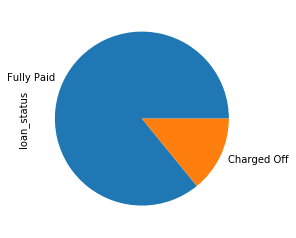

In [24]:
#Simple pie chart to show the percentage of Charged Off vs Fully Paid loans 
new_df.loan_status.value_counts().plot.pie()
plt.show()

In [25]:
#Creating necessary bins
new_df['loan_amt_bins'] = pd.cut(x=new_df.loc[:,'loan_amnt'], bins=[499, 5500, 7500, 10000, 12500, 15000, 35000],
                             labels=['500 to 5500', '5501 to 7500', '7501 to 10000', '10001 to 12500', '12501 to 15000', '15001 to 35000'])
new_df["int_rate_bucket"]=pd.cut(x=new_df['int_rate'], bins=[5.0, 10.0, 15.0, 20.0, 25.0],
                             labels=['5 to 10', '10 to 15', '15 to 20', '20 to 25'])

In [26]:
#Creating dataframes for Charged off and Fully paid
chrgd_off_df=new_df[new_df.loan_status=="Charged Off"]
fully_paid_df=new_df[new_df.loan_status=="Fully Paid"]

## Univariate Analysis

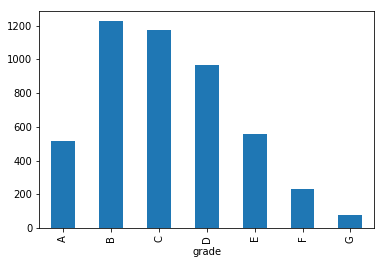

In [27]:
# Charged off on the basis of grades
chrgd_off_df.groupby(by="grade")["id"].count().plot.bar()
plt.show()

## Conclusion: Most charged off loan is from Grade 'B'
## But the data we derived is mis-leading as maximum number of loan issued belongs to Grade 'B'

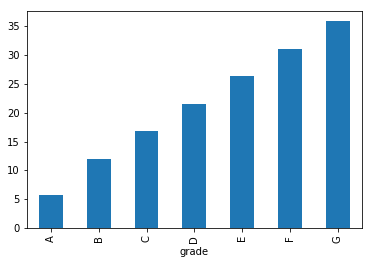

In [28]:
#  Charged off on the basis of grades (% wise)
chrgd_off_per_by_gd_df=100*chrgd_off_df.groupby(by="grade")["id"].count()/new_df.groupby(by="grade")["id"].count()
chrgd_off_per_by_gd_df.plot.bar()
plt.show()

## Conclusion: We can derive that lower the grade more chances for "default" loan

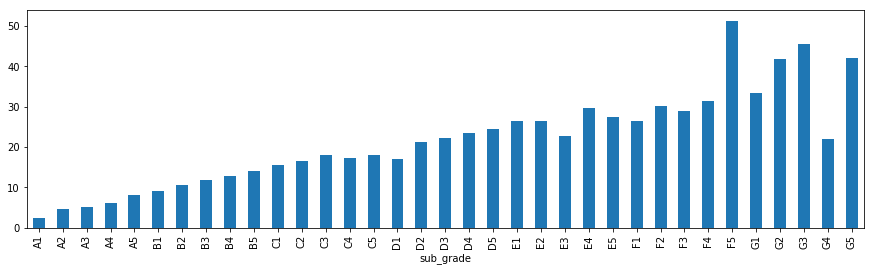

In [29]:
# To make it more clear we used sub-grade comparsion
chrgd_off_per_by_subgd_df=100*chrgd_off_df.groupby(by="sub_grade")["id"].count()/new_df.groupby(by="sub_grade")["id"].count()
plt.figure().set_figwidth(15)
chrgd_off_per_by_subgd_df.plot.bar()
plt.show()

## Conclusion: Collectively G grade persons are more prone to be a defaulter but F5 group has most percentage of Charged Off loan
## but for lower values result is same as with grade

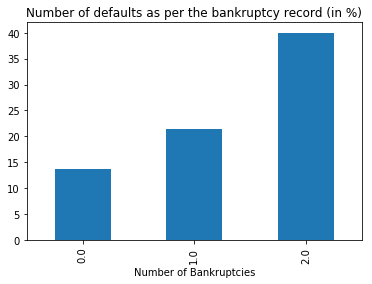

In [30]:
#  Charged off on the basis of Bankruptcies
fig, ax = plt.subplots()
ax.set_title('Number of defaults as per the bankruptcy record (in %)')
(100*chrgd_off_df.pub_rec_bankruptcies.value_counts()/new_df.pub_rec_bankruptcies.value_counts()).plot.bar()
ax.set_xlabel('Number of Bankruptcies')
plt.show()

## Conclusion: The person with more bankruptcies is more prone to be a defaulter

In [31]:
#  Charged off on the basis of revolusion util
print(chrgd_off_df.revol_util.value_counts()/new_df.revol_util.value_counts())

## Conclusion: No conclusive evidence

0%        0.148428
0.01%          NaN
0.03%          NaN
0.04%          NaN
0.05%          NaN
0.10%     0.125000
0.12%     1.000000
0.16%          NaN
0.20%     0.175439
0.30%     0.027778
0.40%     0.176471
0.46%          NaN
0.49%          NaN
0.50%     0.073171
0.54%          NaN
0.60%     0.055556
0.70%     0.161290
0.75%          NaN
0.80%     0.115385
0.83%          NaN
0.86%          NaN
0.90%     0.028571
1%        0.137931
1.10%     0.080000
1.20%     0.137931
1.30%     0.137931
1.40%     0.041667
1.50%          NaN
1.60%     0.052632
1.70%     0.111111
            ...   
97%       0.173913
97.10%    0.171429
97.20%    0.320000
97.30%    0.153846
97.40%    0.241379
97.50%    0.275862
97.60%    0.214286
97.70%    0.222222
97.80%    0.178571
97.90%    0.181818
98%       0.095238
98.10%    0.263158
98.20%    0.266667
98.30%    0.241379
98.40%    0.423077
98.50%    0.200000
98.60%    0.241379
98.70%    0.400000
98.80%    0.142857
98.90%    0.250000
99%       0.307692
99.10%    0.

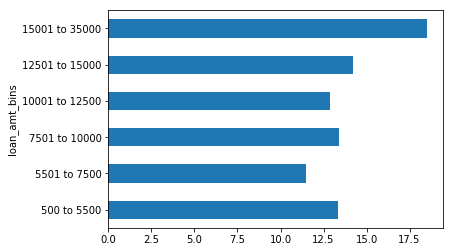

In [32]:
#  Charged off on the basis of loan amount
chrgd_off_per_by_loan_amt_df=100*chrgd_off_df.groupby(by="loan_amt_bins")["id"].count()/new_df.groupby(by="loan_amt_bins")["id"].count()
chrgd_off_per_by_loan_amt_df.plot.barh()
plt.show()

## Conclusion: If the loan amount is low or moderate, chances of person to be a defaulter is almost equal but if the loan
## amount is too high then person is more likely to be a defaulter 

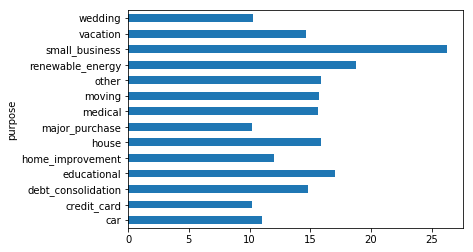

In [33]:
#  Charged off on the basis of purpose
chrgd_off_by_purpose=chrgd_off_df.groupby(by="purpose")["id"].count()*100/new_df.groupby(by="purpose")["id"].count()
chrgd_off_by_purpose.plot.barh()
plt.show()

## Conclusion: Persons taking loan for small businesses are more prone to be a defulater other than that renewable energy and education
## purpose loan has also more than averge chance to be a defulater

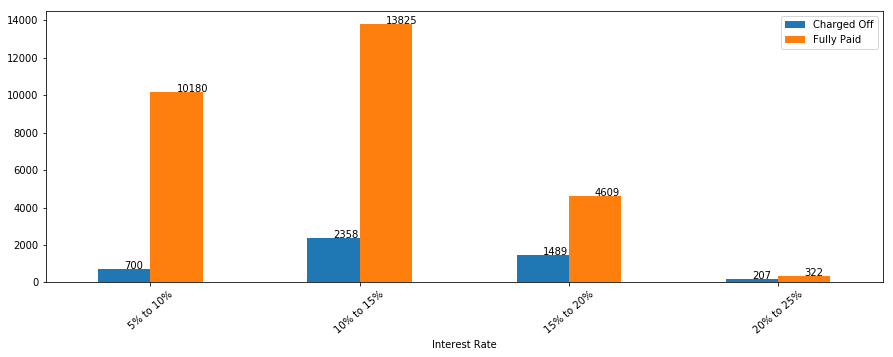

In [34]:
# Charged off and fully paid data on the basis of interest rate
data=[['5% to 10%',0,0], ['10% to 15%',0,0], ['15% to 20%',0,0], ['20% to 25%',0,0]]
df_per_int_rate = pd.DataFrame(data, columns = ['int_rate_bucket', 'charged_off','fully_paid'])
df_per_int_rate['Charged Off']=new_df[new_df.loan_status=="Charged Off"].groupby(['int_rate_bucket'],as_index=False)["id"].count()['id']
df_per_int_rate['Fully Paid']=new_df[new_df.loan_status=="Fully Paid"].groupby(['int_rate_bucket'],as_index=False)["id"].count()['id']
df_per_int_rate['all']=df_per_int_rate['Charged Off']+df_per_int_rate['Fully Paid']
df_per_int_rate['Charged Off in %']=df_per_int_rate['Charged Off']*100/df_per_int_rate['all']
df_per_int_rate['Fully Paid in %']=df_per_int_rate['Fully Paid']*100/df_per_int_rate['all']


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
df_per_int_rate.plot.bar(x = 'int_rate_bucket', y = ['Charged Off', 'Fully Paid'], rot = 40, ax = ax)
ax.set_xlabel('Interest Rate')
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    
## Conslusion: Not a conclusive graph due to too much variance in values 

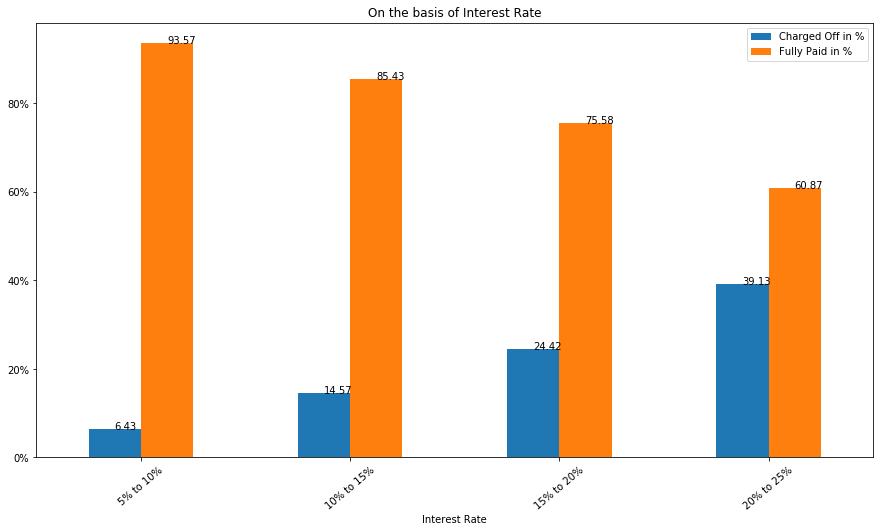

In [35]:
# Same chart with percentage values
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.set_title('On the basis of Interest Rate')
subplt=df_per_int_rate.plot.bar(x = 'int_rate_bucket', y = ['Charged Off in %','Fully Paid in %'], rot = 40, ax = ax)
ax.set_xlabel('Interest Rate')
subplt.yaxis.set_major_formatter(PercentFormatter())
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    
## Conclusion: We can safely say that interest rate is directly proportional to Charged off values.

## Bivariate analysis

In [36]:
# Check and create buckets for monthly installment per monthly income
new_df['ins_per_inc'] = 100*new_df.installment/(new_df.annual_inc/12)
new_df.ins_per_inc.describe()
new_df["ins_per_inc_buckets"]=pd.cut(x=new_df['ins_per_inc'], bins=[0.0, 2.5, 5.0, 7.5, 10.0, 35.0],
                             labels=['0 to 2.5', '2.5 to 5', '5 to 7.5', '7.5 to 10', '10 to 35'])

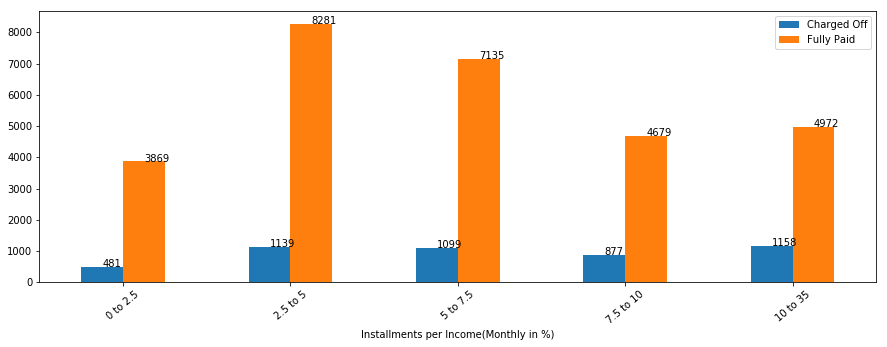

In [37]:
# Charged off and fully paid data on the basis of monthly installment per monthly income ratio
data=[['0 to 2.5',0,0], ['2.5 to 5',0,0], ['5 to 7.5',0,0], ['7.5 to 10',0,0], ['10 to 35',0,0]]
df_per_ins_inc = pd.DataFrame(data, columns = ['ins_per_inc_buckets', 'charged_off','fully_paid'])
df_per_ins_inc['Charged Off']=new_df[new_df.loan_status=="Charged Off"].groupby(['ins_per_inc_buckets'],as_index=False)["id"].count()['id']
df_per_ins_inc['Fully Paid']=new_df[new_df.loan_status=="Fully Paid"].groupby(['ins_per_inc_buckets'],as_index=False)["id"].count()['id']
df_per_ins_inc['all']=new_df.groupby(['ins_per_inc_buckets'],as_index=False)["id"].count()['id']
df_per_ins_inc['Charged Off in %']=df_per_ins_inc['Charged Off']*100/df_per_ins_inc['all']
df_per_ins_inc['Fully Paid in %']=df_per_ins_inc['Fully Paid']*100/df_per_ins_inc['all']

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
df_per_ins_inc.plot.bar(x = 'ins_per_inc_buckets', y = ['Charged Off', 'Fully Paid'], rot = 40, ax = ax)
ax.set_xlabel('Installments per Income(Monthly in %)')
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    
## Conclusion: We can derive that 2.5 to 5% and 10 to 35% interest rates has most values of defualters (5 to 7.5% also has 
##  significant large value) but as we can see the large difference in fully paid values too so result is inconclusive

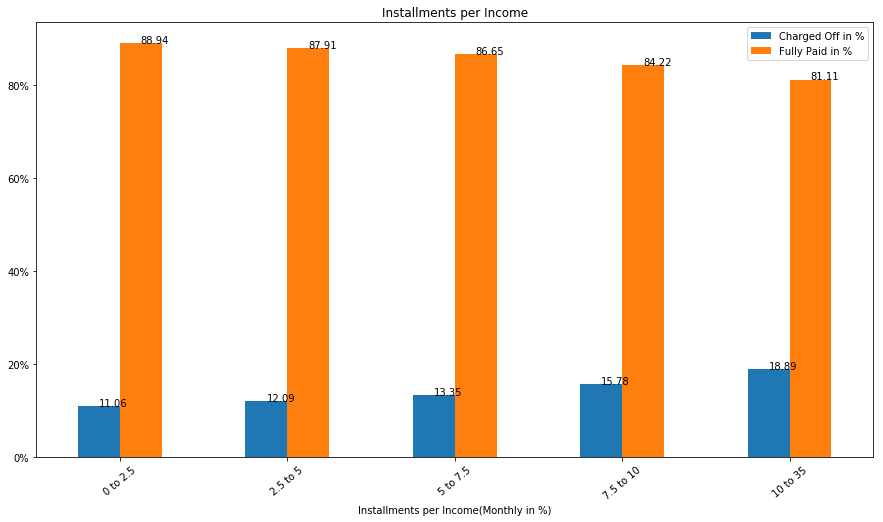

In [38]:
# Same chart with percentage defaulters
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.set_title('Installments per Income')
subplt=df_per_ins_inc.plot.bar(x = 'ins_per_inc_buckets', y = ['Charged Off in %','Fully Paid in %'], rot = 40, ax = ax)
ax.set_xlabel('Installments per Income(Monthly in %)')
subplt.yaxis.set_major_formatter(PercentFormatter())
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
    
## Conclusion: This chart is more clearer picture than the previous one. We can conclude as the percentage of monthly installments
##             increase as per person's salary, they are more prone to be a defaulter